# Data Exploration

This notebook loads and explores the movie dataset.

In [1]:
#-------------------Week 1 Progress-----------------------------

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# define directory path
DATA_DIR = "/Users/kkaur/Documents/AIProject/Code/data"

# verify directory path
print("Current working directory:", os.getcwd())


Current working directory: /Users/kkaur/Documents/AIProject/Code/notebooks


In [4]:
# Load the datasets data
users = pd.read_csv("/Users/kkaur/Documents/AIProject/Code/data/users.csv", sep="|", header=None, encoding="latin1")

movies = pd.read_csv("/Users/kkaur/Documents/AIProject/Code/data/movies.csv", sep="|", header=None, encoding="latin1")

ratings = pd.read_csv("/Users/kkaur/Documents/AIProject/Code/data/ratings.csv", sep="\t", header=None, encoding="latin1")

genres = pd.read_csv("/Users/kkaur/Documents/AIProject/Code/data/genres.csv", sep="|", header=None)





# define columns for each dataset

# For users
users.columns = ["user_id", "age", "gender", "occupation", "zip_code"]

# For movies
movies.columns = ["movie_id", "title", "release_date", "video_release_date", "imdb_url"] + [f"genre_{str(i)}" for i in range(19)]

# For genres
genres.columns = ["genre", "genre_id"]

# For ratings
ratings.columns = ["user_id", "movie_id", "rating", "timestamp"]




# Clean up release_date column as it has all none values
if 'release_date' in movies.columns:
    movies = movies.drop('release_date', axis=1)

# Fill N/A values in imdb_url column with a message
movies['imdb_url'] = movies['imdb_url'].fillna('No URL available')




# Display the first few rows of each dataset
print("\nUsers:")
print(users.head())

print("\nGenres:")
print(genres.head())

print("\nMovies:")
print(movies.head())

print("\nRatings:")
print(ratings.head())



Users:
   user_id  age gender  occupation zip_code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213

Genres:
        genre  genre_id
0     unknown         0
1      Action         1
2   Adventure         2
3   Animation         3
4  Children's         4

Movies:
   movie_id              title  video_release_date  \
0         1   Toy Story (1995)                 NaN   
1         2   GoldenEye (1995)                 NaN   
2         3  Four Rooms (1995)                 NaN   
3         4  Get Shorty (1995)                 NaN   
4         5     Copycat (1995)                 NaN   

                                            imdb_url  genre_0  genre_1  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0        0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0        1   
2  http://us.imdb.c

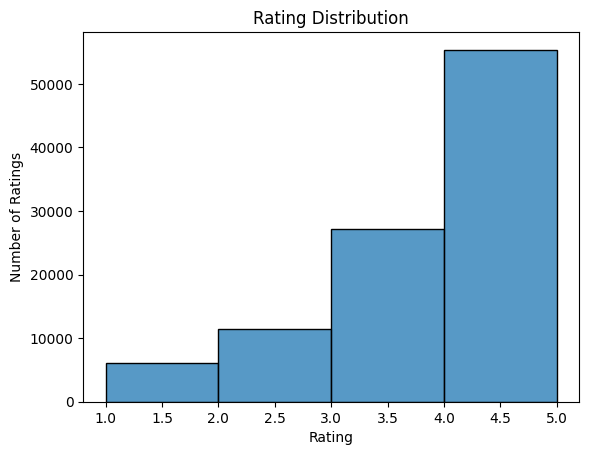

In [5]:
# Create a histogram of ratings distribution
sns.histplot(ratings['rating'], binwidth=1)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Number of Ratings")
plt.show()

In [6]:
#-------------------Week 2 Progress-----------------------------


In [7]:
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [8]:
# MISSING VALUE CHECK  

print("\n--- MISSING VALUES ----------------------------------")
print(users.isnull().sum())
print(movies.isnull().sum())
print(ratings.isnull().sum())


# DUPLICATE CHECK

print("\n--- DUPLICATE ROWS ---------------------------------")
print(f"Duplicate users  : {users.duplicated().sum()}")
print(f"Duplicate movies : {movies.duplicated().sum()}")
print(f"Duplicate ratings: {ratings.duplicated().sum()}")




--- MISSING VALUES ----------------------------------
user_id       0
age           0
gender        0
occupation    0
zip_code      0
dtype: int64
movie_id                 0
title                    0
video_release_date    1682
imdb_url                 0
genre_0                  0
genre_1                  0
genre_2                  0
genre_3                  0
genre_4                  0
genre_5                  0
genre_6                  0
genre_7                  0
genre_8                  0
genre_9                  0
genre_10                 0
genre_11                 0
genre_12                 0
genre_13                 0
genre_14                 0
genre_15                 0
genre_16                 0
genre_17                 0
genre_18                 0
dtype: int64
user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64

--- DUPLICATE ROWS ---------------------------------
Duplicate users  : 0
Duplicate movies : 0
Duplicate ratings: 0


In [9]:
# AGE DISTRIBUTION  

print("\n--- AGE DISTRIBUTION --------------------------------")
print(f"Total users        : {users['age'].count()}")
print(f"Youngest user      : {users['age'].min()} years")
print(f"Oldest user        : {users['age'].max()} years")
print(f"Average age        : {round(users['age'].mean(), 1)} years")
print(f"Median age         : {users['age'].median()} years")
print(f"Standard deviation : {round(users['age'].std(), 1)} years")



# RATING STATISTICS  

print("\n--- RATING STATISTICS  ------------------------------")
print(f"Total ratings      : {ratings['rating'].count()}")
print(f"Lowest rating      : {ratings['rating'].min()}")
print(f"Highest rating     : {ratings['rating'].max()}")
print(f"Average rating     : {round(ratings['rating'].mean(), 2)}")
print(f"Median rating      : {ratings['rating'].median()}")
print(f"Most common rating : {ratings['rating'].mode()[0]}")


#  RATINGS PER USER 

ratings_per_user = ratings.groupby('user_id')['rating'].count()
print("\n--- RATINGS PER USER  -------------------------------")
print(f"Total users        : {ratings_per_user.count()}")
print(f"Minimum ratings    : {ratings_per_user.min()}")
print(f"Maximum ratings    : {ratings_per_user.max()}")
print(f"Average per user   : {round(ratings_per_user.mean(), 1)}")
print(f"Median per user    : {ratings_per_user.median()}")


# AVERAGE RATINGS BY GENDER

ratings_with_gender = ratings.merge(users, on='user_id')
gender_avg = ratings_with_gender.groupby('gender')['rating'].mean().round(2)
gender_counts = ratings_with_gender.groupby('gender')['rating'].count()

print("\n--- AVERAGE RATINGS BY GENDER  ----------------------")
for gender in gender_avg.index:
    print(f"{gender}: {gender_avg[gender]} avg from {gender_counts[gender]} ratings")


# TOP 10 MOST RATED MOVIES

ratings_per_movie = ratings.groupby('movie_id')['rating'].agg(['count', 'mean']).reset_index()
movie_stats = ratings_per_movie.merge(movies[['movie_id', 'title']], on='movie_id')
top_movies = movie_stats.sort_values(by='count', ascending=False).head(10)

print("\n--- TOP 10 MOST RATED MOVIES  -----------------------")
for _, row in top_movies.iterrows():
    print(f"{row['title']}: {row['count']} ratings (Avg: {round(row['mean'], 2)})")


# GENRE DISTRIBUTION

genre_cols = movies.columns[5:]
genre_counts = movies[genre_cols].sum().sort_values(ascending=False)

print("\n--- GENRE DISTRIBUTION ------------------------------")
for genre, count in genre_counts.items():
    print(f"{genre}: {count} movies")


# MATRIX SPARSITY CHECK

user_movie_matrix = ratings.pivot(index='user_id', columns='movie_id', values='rating').fillna(0)
total_elements = user_movie_matrix.shape[0] * user_movie_matrix.shape[1]
nonzero_elements = (user_movie_matrix != 0).sum().sum()
sparsity = 1 - (nonzero_elements / total_elements)

print("\n--- USER-MOVIE MATRIX SPARSITY  ---------------------")
print(f"Sparsity: {sparsity:.2%} (i.e., {round(sparsity*100, 2)}% of the matrix is empty)")


--- AGE DISTRIBUTION --------------------------------
Total users        : 943
Youngest user      : 7 years
Oldest user        : 73 years
Average age        : 34.1 years
Median age         : 31.0 years
Standard deviation : 12.2 years

--- RATING STATISTICS  ------------------------------
Total ratings      : 100000
Lowest rating      : 1
Highest rating     : 5
Average rating     : 3.53
Median rating      : 4.0
Most common rating : 4

--- RATINGS PER USER  -------------------------------
Total users        : 943
Minimum ratings    : 20
Maximum ratings    : 737
Average per user   : 106.0
Median per user    : 65.0

--- AVERAGE RATINGS BY GENDER  ----------------------
F: 3.53 avg from 25740 ratings
M: 3.53 avg from 74260 ratings

--- TOP 10 MOST RATED MOVIES  -----------------------
Star Wars (1977): 583 ratings (Avg: 4.36)
Contact (1997): 509 ratings (Avg: 3.8)
Fargo (1996): 508 ratings (Avg: 4.16)
Return of the Jedi (1983): 507 ratings (Avg: 4.01)
Liar Liar (1997): 485 ratings (Avg: 3.

In [10]:
#-------------------Week 3 Progress-----------------------------

In [11]:
!pip install tabulate


Looking in indexes: https://artifactory.global.square/artifactory/api/pypi/block-pypi/simple
ERROR: Could not find a version that satisfies the requirement tabulate (from versions: none)
ERROR: No matching distribution found for tabulate

[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: python3.8 -m pip install --upgrade pip


In [12]:
from IPython.display import display

#   Recommend movies for a user using collaborative filtering.

def recommend_movies_for_user(user_id, min_rating=4, top_n=5, min_similar_ratings=10):

    try:
        # Get highly rated movies by this user
        user_ratings = ratings[ratings['user_id'] == user_id]
        high_rated = user_ratings[user_ratings['rating'] >= min_rating]['movie_id']

        if high_rated.empty:
            print(f"\n! User {user_id} has not rated any movies ≥ {min_rating}.")
            return pd.DataFrame()

        # Find similar users
        similar_users = ratings[
            (ratings['movie_id'].isin(high_rated)) &
            (ratings['rating'] >= min_rating) &
            (ratings['user_id'] != user_id)
        ]

        if similar_users.empty:
            print(f"\n! No similar users found for User {user_id}.")
            return pd.DataFrame()

        # Weight similar users by overlap count
        user_similarity = similar_users.groupby('user_id').size() / len(high_rated)

        # Find new movies rated highly by similar users
        recommendations = ratings[
            (ratings['user_id'].isin(user_similarity.index)) &
            (~ratings['movie_id'].isin(high_rated)) &
            (ratings['rating'] >= min_rating)
        ]

        if recommendations.empty:
            print(f"\n! No new recommendations available for User {user_id}.")
            return pd.DataFrame()

        # Merge with similarity weights
        recommendations = recommendations.merge(user_similarity.reset_index(), on='user_id', how='left')
        recommendations['weighted_rating'] = recommendations['rating'] * recommendations[0]

        # Aggregate by movie
        top = recommendations.groupby('movie_id').agg({
            'weighted_rating': 'mean',
            'rating': ['count', 'mean']
        })
        top.columns = ['weighted_avg', 'rating_count', 'avg_rating']
        top = top[top['rating_count'] >= min_similar_ratings]
        top = top.sort_values(by='weighted_avg', ascending=False).head(top_n)

        if top.empty:
            print(f"\n! No movies met the threshold of {min_similar_ratings}+ ratings.")
            return pd.DataFrame()

        # Add movie titles
        top['title'] = top.index.map(lambda x: movies.loc[movies['movie_id'] == x, 'title'].values[0])

        # Reorder columns
        final_df = top[['weighted_avg', 'rating_count', 'avg_rating', 'title']]
        final_df.index.name = 'movie_id'
        print("\n")

        print(f"\n--------------------Top {top_n} Movie Recommendations for User {user_id}--------------------\n")
        display(final_df.reset_index())
        return final_df.reset_index()

    except Exception as e:
        print(f"! Error: {str(e)}")
        return pd.DataFrame()


In [13]:
for uid in [10, 900, 500, 1, 943]:
    recommend_movies_for_user(uid)






--------------------Top 5 Movie Recommendations for User 10--------------------



,movie_id,weighted_avg,rating_count,avg_rating,title
0,618,1.989881,10,4.200000,Picnic (1955)
1,601,1.825092,13,4.538462,For Whom the Bell Tolls (1943)
2,836,1.753348,16,4.437500,Ninotchka (1939)
3,1286,1.743452,10,4.500000,Shall We Dance? (1937)
4,613,1.686791,21,4.428571,My Man Godfrey (1936)





--------------------Top 5 Movie Recommendations for User 900--------------------



,movie_id,weighted_avg,rating_count,avg_rating,title
0,601,2.349112,13,4.538462,For Whom the Bell Tolls (1943)
1,634,2.195266,13,4.538462,Microcosmos: Le peuple de l'herbe (1996)
2,965,2.071006,13,4.230769,Funny Face (1957)
3,613,2.043956,21,4.428571,My Man Godfrey (1936)
4,614,2.029777,31,4.322581,Giant (1956)





--------------------Top 5 Movie Recommendations for User 500--------------------



,movie_id,weighted_avg,rating_count,avg_rating,title
0,1286,1.431532,10,4.5,Shall We Dance? (1937)
1,618,1.375676,10,4.2,Picnic (1955)
2,1045,1.335135,10,4.2,Fearless (1993)
3,972,1.328829,10,4.1,Passion Fish (1992)
4,1113,1.328829,10,4.2,Mrs. Parker and the Vicious Circle (1994)





--------------------Top 5 Movie Recommendations for User 1--------------------



,movie_id,weighted_avg,rating_count,avg_rating,title
0,1286,1.580368,10,4.500000,Shall We Dance? (1937)
1,562,1.530675,18,4.444444,"Quick and the Dead, The (1995)"
2,618,1.514724,10,4.200000,Picnic (1955)
3,686,1.483129,28,4.392857,"Perfect World, A (1993)"
4,601,1.478056,13,4.538462,For Whom the Bell Tolls (1943)





--------------------Top 5 Movie Recommendations for User 943--------------------



,movie_id,weighted_avg,rating_count,avg_rating,title
0,1220,2.043403,12,4.583333,Higher Learning (1995)
1,562,1.942130,18,4.444444,"Quick and the Dead, The (1995)"
2,43,1.841667,10,4.100000,Disclosure (1994)
3,552,1.787660,13,4.230769,Species (1995)
4,1218,1.768429,13,4.230769,Friday (1995)
